In [1]:
import msprime
import numpy as np
import sys
from IPython.display import SVG
%load_ext rpy2.ipython
# %reload_ext rpy2.ipython

In [2]:
%%R

library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [33]:
%%R

tab <- tibble()
for (sim in 1:5) {
    for (rho in c('0.0001', '0.005', '0.01', '0.05', '0.1', '0.5')) {
        for (tht in c('0.0001', '0.005', '0.01', '0.05', '0.1', '0.5')) {
            tab <- read_csv(paste0('../steps/01_msprime_simulations/sim', sim, '_rho', rho, '_tht', tht, '.csv'),
                           show_col_types = FALSE) %>%
                mutate(
                    sim = sim,
                    rho = rho,
                    tht = tht
                ) %>%
                bind_rows(tab)
        }
    }
}

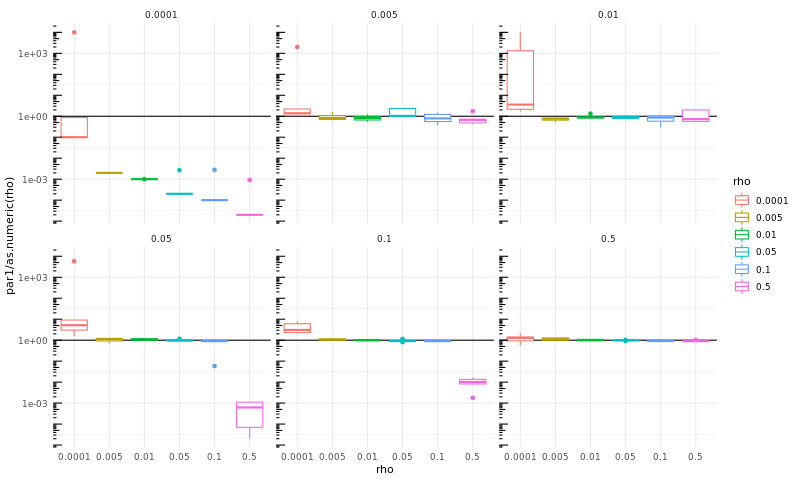

In [58]:
%%R -w 800

library('see')

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step)) %>%
    ungroup() %>%
    ggplot() +
    geom_hline(aes(yintercept = 1)) +
    geom_boxplot(aes(
        rho, 
        par1/as.numeric(rho),
        color = rho)) +
    facet_wrap(~tht) +
    scale_y_log10() +
    annotation_logticks(sides = 'l') +
    theme_minimal()

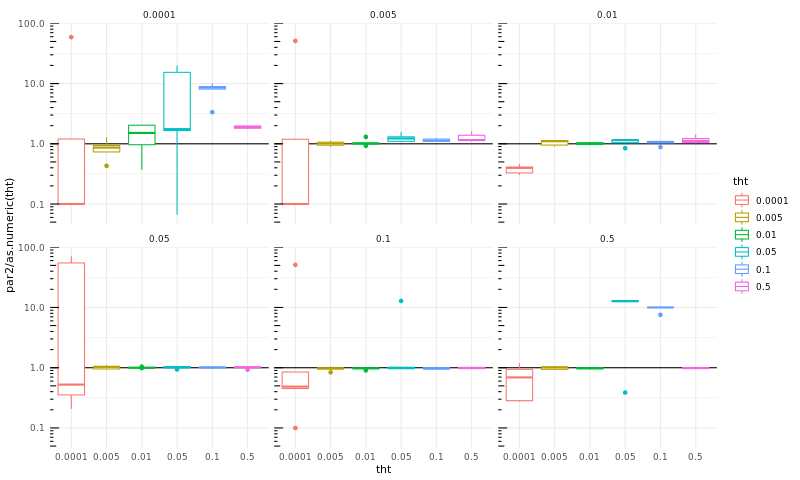

In [57]:
%%R -w 800

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step)) %>%
    ungroup() %>%
    ggplot() +
    geom_hline(aes(yintercept = 1)) +
    geom_boxplot(aes(tht, 
                   par2/as.numeric(tht),
                   color = tht)) +
    facet_wrap(~rho) +
    scale_y_log10() +
    annotation_logticks(sides = 'l') +
    theme_minimal()

In [55]:
%%R

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step))

# A tibble: 180 × 9
# Groups:   sim, rho, tht [180]
    step     par1      par2      fn           gr1         gr2   sim rho   tht   
   <dbl>    <dbl>     <dbl>   <dbl>         <dbl>       <dbl> <int> <chr> <chr> 
 1    21 0.446    0.492     57950.    -0.00645       0.00292      5 0.5   0.5   
 2    15 0.00680  1         31007.    -0.0484     -365.           5 0.5   0.1   
 3    24 0.00001  0.633     19311.  2861.           -0.000380     5 0.5   0.05  
 4    12 0.271    0.00962    5381.     0.00000912    0.0305       5 0.5   0.01  
 5    19 0.357    0.00470    2967.    -0.000694     -0.283        5 0.5   0.005 
 6    35 0.000461 0.0000941    99.0  338.         9327.           5 0.5   0.0001
 7    19 0.0996   0.504     54329.     0.0271       -0.0145       5 0.1   0.5   
 8    41 0.0994   0.101     30173.    -0.000637     -0.00331      5 0.1   0.1   
 9    25 0.00584  0.642     19210.     0.0212       -0.0183       5 0.1   0.05  
10    32 0.0581   0.00967    5365.    -0.0424       -0.06

In [56]:
%%R

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step), rho == 0.5) %>%
    select(sim, step, par1, rho, par2, tht, everything()) %>%
    print(n = 30)

# A tibble: 30 × 9
# Groups:   sim, rho, tht [30]
     sim  step      par1 rho        par2 tht         fn      gr1          gr2
   <int> <dbl>     <dbl> <chr>     <dbl> <chr>    <dbl>    <dbl>        <dbl>
 1     5    21 0.446     0.5   0.492     0.5    57950.  -6.45e-3     0.00292 
 2     5    15 0.00680   0.5   1         0.1    31007.  -4.84e-2  -365.      
 3     5    24 0.00001   0.5   0.633     0.05   19311.   2.86e+3    -0.000380
 4     5    12 0.271     0.5   0.00962   0.01    5381.   9.12e-6     0.0305  
 5     5    19 0.357     0.5   0.00470   0.005   2967.  -6.94e-4    -0.283   
 6     5    35 0.000461  0.5   0.0000941 0.0001    99.0  3.38e+2  9327.      
 7     4    20 0.433     0.5   0.492     0.5    58339.  -1.10e-2     0.00614 
 8     4    14 0.00407   0.5   1         0.1    30106.   1.95e-2  -737.      
 9     4    40 0.000585  0.5   0.653     0.05   19495.  -1.42e+1     0.400   
10     4    12 0.365     0.5   0.00951   0.01    5322.  -1.83e-3    -0.201   
11     4    21